# Does distribution of variables affect model performance?

 Few algorithms make assumption based on distribution of variables.Linear Regression has the following assumptions.
    
   - Linear relationship with the outcome Y
   - Multivariate normality
   - No or little multicollinearity
   - Homoscedasticity
    (error term (that is, the “noise” or random disturbance in the relationship between the 
    independent variables (Xs) and the dependent variable (Y)) 
    is the same across all values of the independent variables.)
                                  
Some machine learning models, including Neural Networks, Support Vector Machines, Tree based methods and PCA do not make any assumption over the distribution of the independent variables. However, in many occasions the model performance may benefit from a "Gaussian-like" distribution


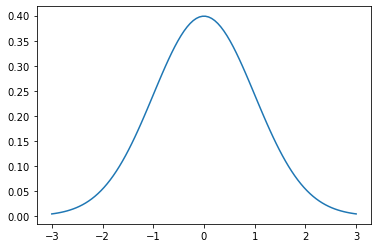

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import scipy.stats as sc
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x,sc.norm.pdf(x, mu, sigma))

plt.show()

In [9]:
from numpy import linspace
from numpy import pi,sqrt,exp
from scipy.special import erf

from pylab import plot,show

def pdf(x):
    return 1/sqrt(2*pi) * exp(-x**2/2)

def cdf(x):
    return (1 + erf(x/sqrt(2))) / 2

def skew(x,e=0,w=1,a=0):
    t = (x-e) / w
    return 2 / w * pdf(t) * cdf(a*t)

n = 2**10

e = 1.0 # location
w = 2.0 # scale

x = linspace(-10,10,n) 

In [10]:
pdf(x)

array([7.69459863e-23, 9.35425125e-23, 1.13675297e-22, ...,
       1.13675297e-22, 9.35425125e-23, 7.69459863e-23])

In [11]:
cdf(x)

array([0., 0., 0., ..., 1., 1., 1.])

In [12]:
skew(x)

array([7.69459863e-23, 9.35425125e-23, 1.13675297e-22, ...,
       1.13675297e-22, 9.35425125e-23, 7.69459863e-23])

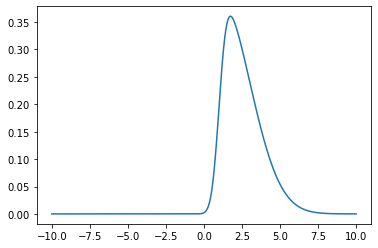

In [13]:
p = skew(x,e,w,5)
plot(x,p)
plt.show()

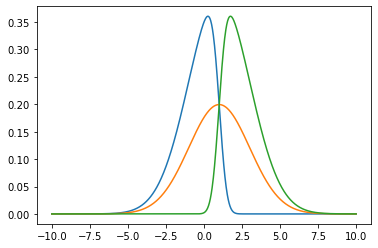

In [14]:
for a in [-5,0,5]:   #blue,orange,green
    p = skew(x,e,w,a)
    plot(x,p)

show()

# Handling Skewness

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pylab 
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error #regression evaluation

from sklearn.metrics import roc_auc_score #classifier evaluation

# Example: Titanic Survival Prediction

In [17]:
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\\titanic\\train.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


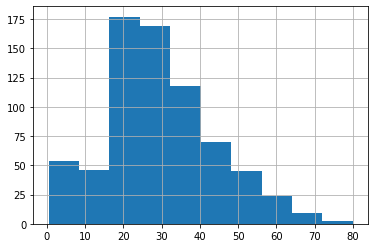

In [18]:
#Distribution of Age variable
data.Age.hist()

# Quantile-Quantile plot (Q-Q plot)

In a QQ-plot, the quantiles of the variable are plotted on the vertical axis, and the quantiles of a specified probability distribution (Gaussian distribution) are on the horizontal axis. The plot consists of a series of points that show the relationship between the real data and the specified probability distribution. If the values of a variable perfectly match the specified probability distribution, the points on the graph will form a 45 degree line.

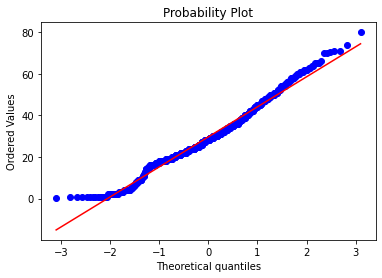

In [19]:
temp = data.dropna(subset=['Age'])
stats.probplot(temp.Age, dist="norm", plot=pylab)
pylab.show()

Observation: Little skwed on left. Apply transformation to rectify

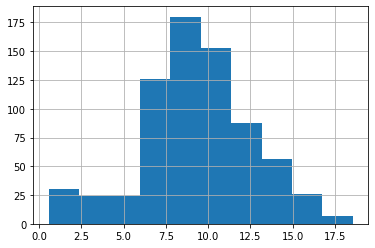

In [20]:
(data.Age**(1/1.5)).hist()

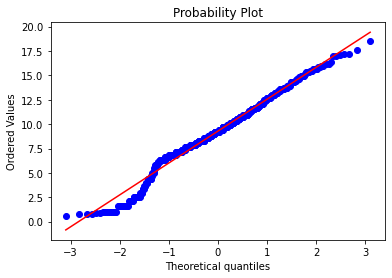

In [21]:
stats.probplot((temp.Age**(1/1.5)), dist="norm", plot=pylab)
pylab.show()

Conclusion: Even transformation did not end up in Gaussian distribution of the transformed Age values.

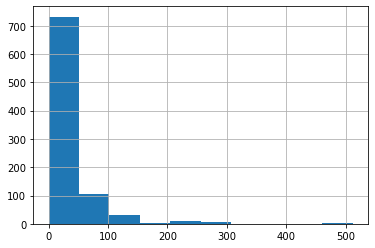

In [23]:
#Distribution of Age variable
data.Fare.hist()

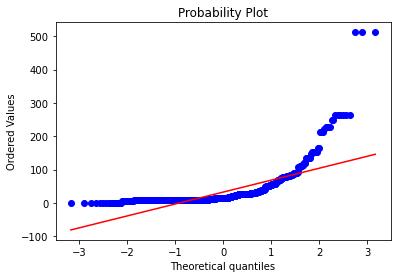

In [24]:
#Q-Q plot
stats.probplot(data.Fare, dist="norm", plot=pylab)
pylab.show()

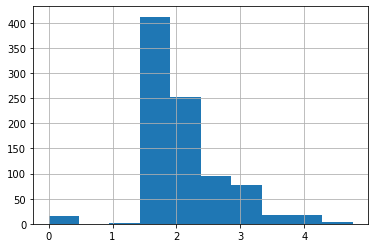

In [25]:
#transformation
(data.Fare**(1/4)).hist()

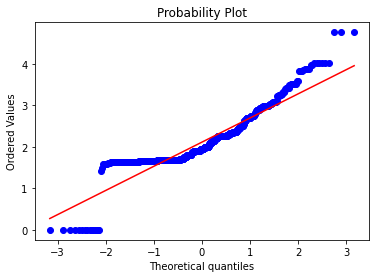

In [26]:
stats.probplot((data.Fare**(1/4)), dist="norm", plot=pylab)
pylab.show()

Conclusion: Transformation is not perfect but it does end in a broader distribution of the values over a wider value range of the variable

# Performance Analysis

In [27]:
#adding new transformed var to dataset
data['Fare_transformed'] = data.Fare**(1/4)
data['Age_transformed'] = data.Age**(1/1.5)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(data.fillna(0), data.Survived, test_size=0.3,
                                                    random_state=12)
X_train.shape, X_test.shape

((623, 6), (268, 6))

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [35]:
#Using Original Data
print("Using Original Data")
logit = LogisticRegression(random_state=12, C=1000,solver = 'lbfgs') # c big to avoid regularization
logit.fit(X_train[['Age', 'Fare']], y_train)

pred = logit.predict_proba(X_train[['Age', 'Fare']])
print('Train: Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = logit.predict_proba(X_test[['Age', 'Fare']])
print('Test: Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

#Using Transformed Data
print("Using Transformed Data")
logit = LogisticRegression(random_state=12, C=1000,solver = 'lbfgs') # c big to avoid regularization
logit.fit(X_train[['Age_transformed', 'Fare_transformed']], y_train)

pred = logit.predict_proba(X_train[['Age_transformed', 'Fare_transformed']])
print('Train: Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = logit.predict_proba(X_test[['Age_transformed', 'Fare_transformed']])
print('Test: Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Using Original Data
Train: Logistic Regression roc-auc: 0.7048201359947357
Test: Logistic Regression roc-auc: 0.6791664247982817
Using Transformed Data
Train: Logistic Regression roc-auc: 0.7099747751699934
Test: Logistic Regression roc-auc: 0.6733035351483136


# SVC

In [39]:
#Using Original Data
print("Using Original Data")
SVM_model = SVC(random_state=12, probability=True,gamma = 'auto')
SVM_model.fit(X_train[['Age', 'Fare']], y_train)

pred = SVM_model.predict_proba(X_train[['Age', 'Fare']])
print('Train: Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = SVM_model.predict_proba(X_test[['Age', 'Fare']])
print('Test: Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

#Using Transformed Data
print("Using Transformed Data")
SVM_model = SVC(random_state=12, probability=True,gamma = 'auto')
SVM_model.fit(X_train[['Age_transformed', 'Fare_transformed']], y_train)

pred = SVM_model.predict_proba(X_train[['Age_transformed', 'Fare_transformed']])
print('Train: Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = SVM_model.predict_proba(X_test[['Age_transformed', 'Fare_transformed']])
print('Test: Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Using Original Data
Train: Logistic Regression roc-auc: 0.9062458872559771
Test: Logistic Regression roc-auc: 0.641202763104429
Using Transformed Data
Train: Logistic Regression roc-auc: 0.7495887255977188
Test: Logistic Regression roc-auc: 0.6753932779938469


Observation: Improvement can be seen clearly

# Random Forest

In [40]:
#Using Original Data
print("Using Original Data")
rf = RandomForestClassifier(n_estimators=700, random_state=39)
rf.fit(X_train[['Age', 'Fare']], y_train)
pred = rf.predict_proba(X_train[['Age', 'Fare']])
print('Train: Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf.predict_proba(X_test[['Age', 'Fare']])
print('Test: Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

#Using Transformed Data
print("Using Transformed Data")
rf = RandomForestClassifier(n_estimators=700, random_state=39)
rf.fit(X_train[['Age_transformed', 'Fare_transformed']], y_train)
pred = rf.predict_proba(X_train[['Age_transformed', 'Fare_transformed']])
print('Train: Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf.predict_proba(X_test[['Age_transformed', 'Fare_transformed']])
print('Test: Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Using Original Data
Train: Random Forests roc-auc: 0.9919883746435622
Test: Random Forests roc-auc: 0.7079874615429267
Using Transformed Data
Train: Random Forests roc-auc: 0.991966440008774
Test: Random Forests roc-auc: 0.7018343298310792


Observation: Not much improvement

# Example: House Price Prediction

In [43]:
cols = ['LotArea', 'BsmtFinSF1','GrLivArea', 'OpenPorchSF', 'YearBuilt', 'SalePrice']
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\\house_price.csv', usecols=cols)
data.head()

,LotArea,YearBuilt,BsmtFinSF1,GrLivArea,OpenPorchSF,SalePrice
0,8450,2003,706,1710,61,208500
1,9600,1976,978,1262,0,181500
2,11250,2001,486,1786,42,223500
3,9550,1915,216,1717,35,140000
4,14260,2000,655,2198,84,250000


In [44]:
data[cols].isnull().sum()

LotArea        0
BsmtFinSF1     0
GrLivArea      0
OpenPorchSF    0
YearBuilt      0
SalePrice      0
dtype: int64

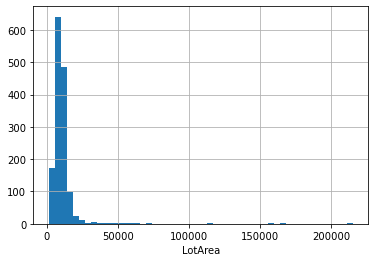

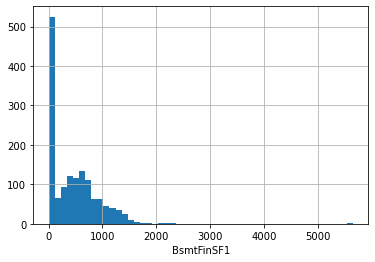

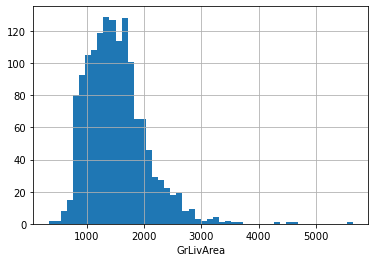

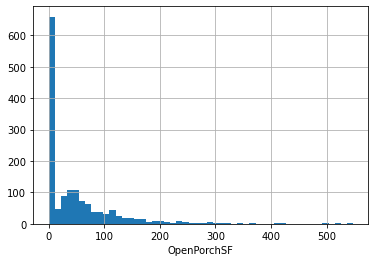

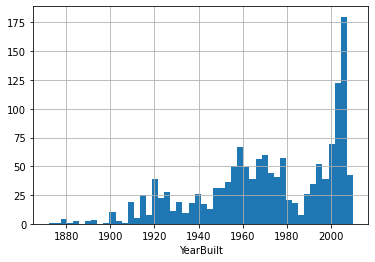

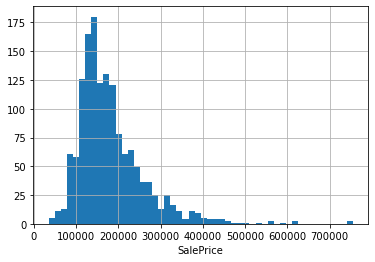

In [45]:
for col in cols:
    fig = data[col].hist(bins=50)
    fig.set_xlabel(col)
    fig.set_label('Number of houses')
    plt.show()

Observation: Not normally distributed

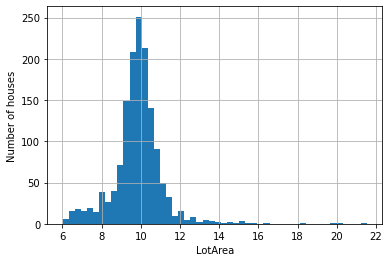

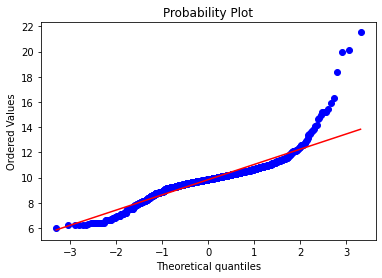

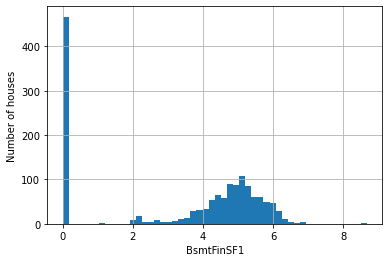

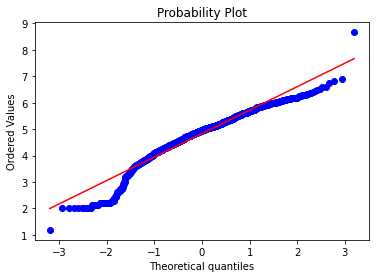

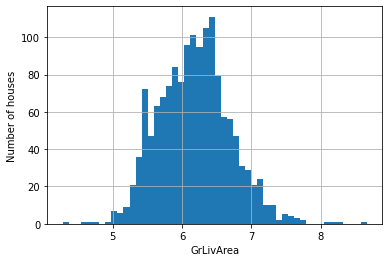

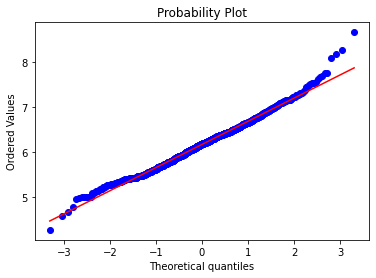

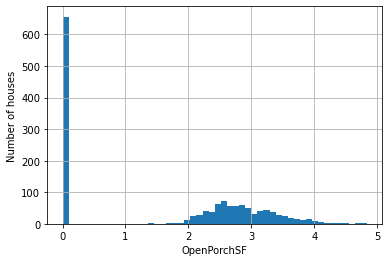

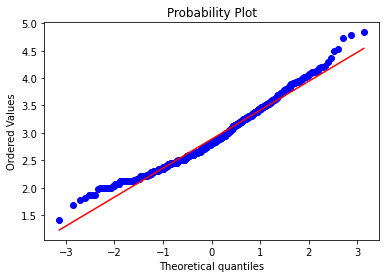

In [46]:
for col in cols:
    if col not in ['SalePrice', 'YearBuilt']:
        data[col+'_transformed'] = data[col]**(1/4)
        fig = data[col+'_transformed'].hist(bins=50)
        fig.set_xlabel(col)
        fig.set_ylabel('Number of houses')
        plt.show()
        stats.probplot(data[data[col+'_transformed']!=0][col+'_transformed'], dist="norm", plot=pylab)
        plt.show()
        

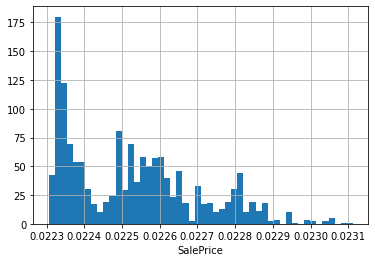

In [47]:
data['YearBuilt_transformed'] = data['YearBuilt']**(1/-2)
fig = data['YearBuilt_transformed'].hist(bins=50)
fig.set_xlabel(col)
plt.show()

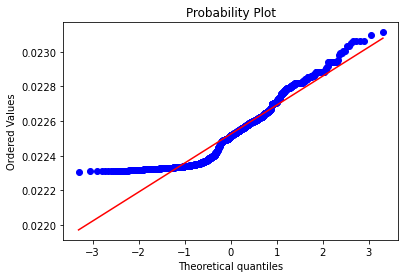

In [48]:
stats.probplot(data['YearBuilt_transformed'], dist="norm", plot=pylab)
pylab.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data.fillna(0), data.SalePrice, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 11), (438, 11))

In [50]:
cols = cols[0:-1]
cols

['LotArea', 'BsmtFinSF1', 'GrLivArea', 'OpenPorchSF', 'YearBuilt']

In [52]:
cols_transformed = [col+'_transformed' for col in cols]
cols_transformed

['LotArea_transformed',
 'BsmtFinSF1_transformed',
 'GrLivArea_transformed',
 'OpenPorchSF_transformed',
 'YearBuilt_transformed']

In [53]:
scaler = StandardScaler()
X_train_o = scaler.fit_transform(X_train[cols])
X_test_o = scaler.transform(X_test[cols])

In [54]:
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train[cols_transformed])
X_test_t = scaler.transform(X_test[cols_transformed])

# Linear Regression

In [55]:
#Using Original Data
print("Using Original Data")
linreg = LinearRegression()
linreg.fit(X_train_o, y_train)

pred = linreg.predict(X_train_o)
print('Train: Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
pred = linreg.predict(X_test_o)
print('Test: Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

#Using Transformed Data
print("Using Transformed Data")
cols_transformed = [col+'_transformed' for col in cols]
linreg = LinearRegression()
linreg.fit(X_train_t, y_train)

pred = linreg.predict(X_train_t)
print('Train: Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
pred = linreg.predict(X_test_t)
print('Test: Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Using Original Data
Train: Linear Regression mse: 1685940584.8626068
Test: Linear Regression mse: 2719110421.3312297

Using Transformed Data
Train: Linear Regression mse: 1882403543.7678099
Test: Linear Regression mse: 2472286266.3097267



Observation: Model built using the natural distributions is over-fitting to the train set

# Random Forest

In [56]:
#Using Original Data
print("Using Original Data")
rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
rf.fit(X_train_o, y_train)
pred = rf.predict(X_train_o)
print('Train : Random Forests mse: {}'.format(mean_squared_error(y_train, pred)))
pred = rf.predict(X_test_o)
print('Test: Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print()


#Using Transformed Data
print("Using Transformed Data")
rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
rf.fit(X_train_t, y_train)
pred = rf.predict(X_train_t)
print('Train: Random Forests mse: {}'.format(mean_squared_error(y_train, pred)))
pred = rf.predict(X_test_t)
print('Test: Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print()


Using Original Data
Train : Random Forests mse: 2719095855.980676
Test: Random Forests mse: 3276824559.070401

Using Transformed Data
Train: Random Forests mse: 2719095855.980676
Test: Random Forests mse: 3276824559.070401



Observation: Random Forests is not affected by variable transformation